# Exploratory Data Analysis

#### Initial Data Loading and Inspection

In [1]:
#Read in file with listing data
import pandas as pd
airbnb = pd.read_csv("listings-2.csv")

In [2]:
#View top 5 rows
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5269,https://www.airbnb.com/rooms/5269,20240913025425,2024-09-13,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.87,5.00,4.84,119-269-5808-01R,f,2,2,0,0,0.23
1,5387,https://www.airbnb.com/rooms/5387,20240913025425,2024-09-13,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,...,4.88,4.75,4.77,TA-163-133-0304-01,t,2,2,0,0,1.26
2,5480,https://www.airbnb.com/rooms/5480,20240913025425,2024-09-13,city scrape,Isle Of You Naturally Farm Retreat,The Best Choice for your Clothing Optional Nud...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
3,5532,https://www.airbnb.com/rooms/5532,20240913025425,2024-09-14,previous scrape,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,This split-level condo is right across the str...,NaN,https://a0.muscache.com/pictures/13743/134691a...,8279,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,7888,https://www.airbnb.com/rooms/7888,20240913025425,2024-09-13,city scrape,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We offer a medium term rental requiring a mini...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,...,4.76,4.25,4.60,GE-104-390-7584-01,f,1,1,0,0,0.74


Upon initial inspection, there are many columns which contain metadata related to the scrape which we can drop before we perform any analysis.

In [3]:
#Evaluate column types and look for null values
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35295 entries, 0 to 35294
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35295 non-null  int64  
 1   listing_url                                   35295 non-null  object 
 2   scrape_id                                     35295 non-null  int64  
 3   last_scraped                                  35295 non-null  object 
 4   source                                        35295 non-null  object 
 5   name                                          35295 non-null  object 
 6   description                                   33878 non-null  object 
 7   neighborhood_overview                         17482 non-null  object 
 8   picture_url                                   35295 non-null  object 
 9   host_id                                       35295 non-null 

We have 35,395 rows of data. Most columns have at least a few thousand nulls values, which we can impute, but we must be careful to not impute columns with meaningful nulls like first_review, because that tells us that a property has either not been rented out yet or stayed at, which might be useful information later on. We will start by removing columns related to the scrape, which are not useful to us.

There are also columns which should be numeric like price and host_response_rate, so we will need to drop the $ and % symbols and adjust the data type before performing EDA. Additionally we will need to format date variables into the date-time format

In [2]:
#Convert date columns to datetime
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'], errors='coerce')
airbnb['first_review'] = pd.to_datetime(airbnb['first_review'], errors='coerce')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], errors='coerce')

#Remove %
airbnb['host_response_rate'] = airbnb['host_response_rate'].replace({'%': ''}, regex=True).astype(float) / 100
airbnb['host_acceptance_rate'] = airbnb['host_acceptance_rate'].replace({'%': ''}, regex=True).astype(float) / 100

#Remove $
airbnb['price'] = airbnb['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35295 entries, 0 to 35294
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            35295 non-null  int64         
 1   listing_url                                   35295 non-null  object        
 2   scrape_id                                     35295 non-null  int64         
 3   last_scraped                                  35295 non-null  object        
 4   source                                        35295 non-null  object        
 5   name                                          35295 non-null  object        
 6   description                                   33878 non-null  object        
 7   neighborhood_overview                         17482 non-null  object        
 8   picture_url                                   35295 non-null  obje

#### Correlation Heatmap for Numeric Variables

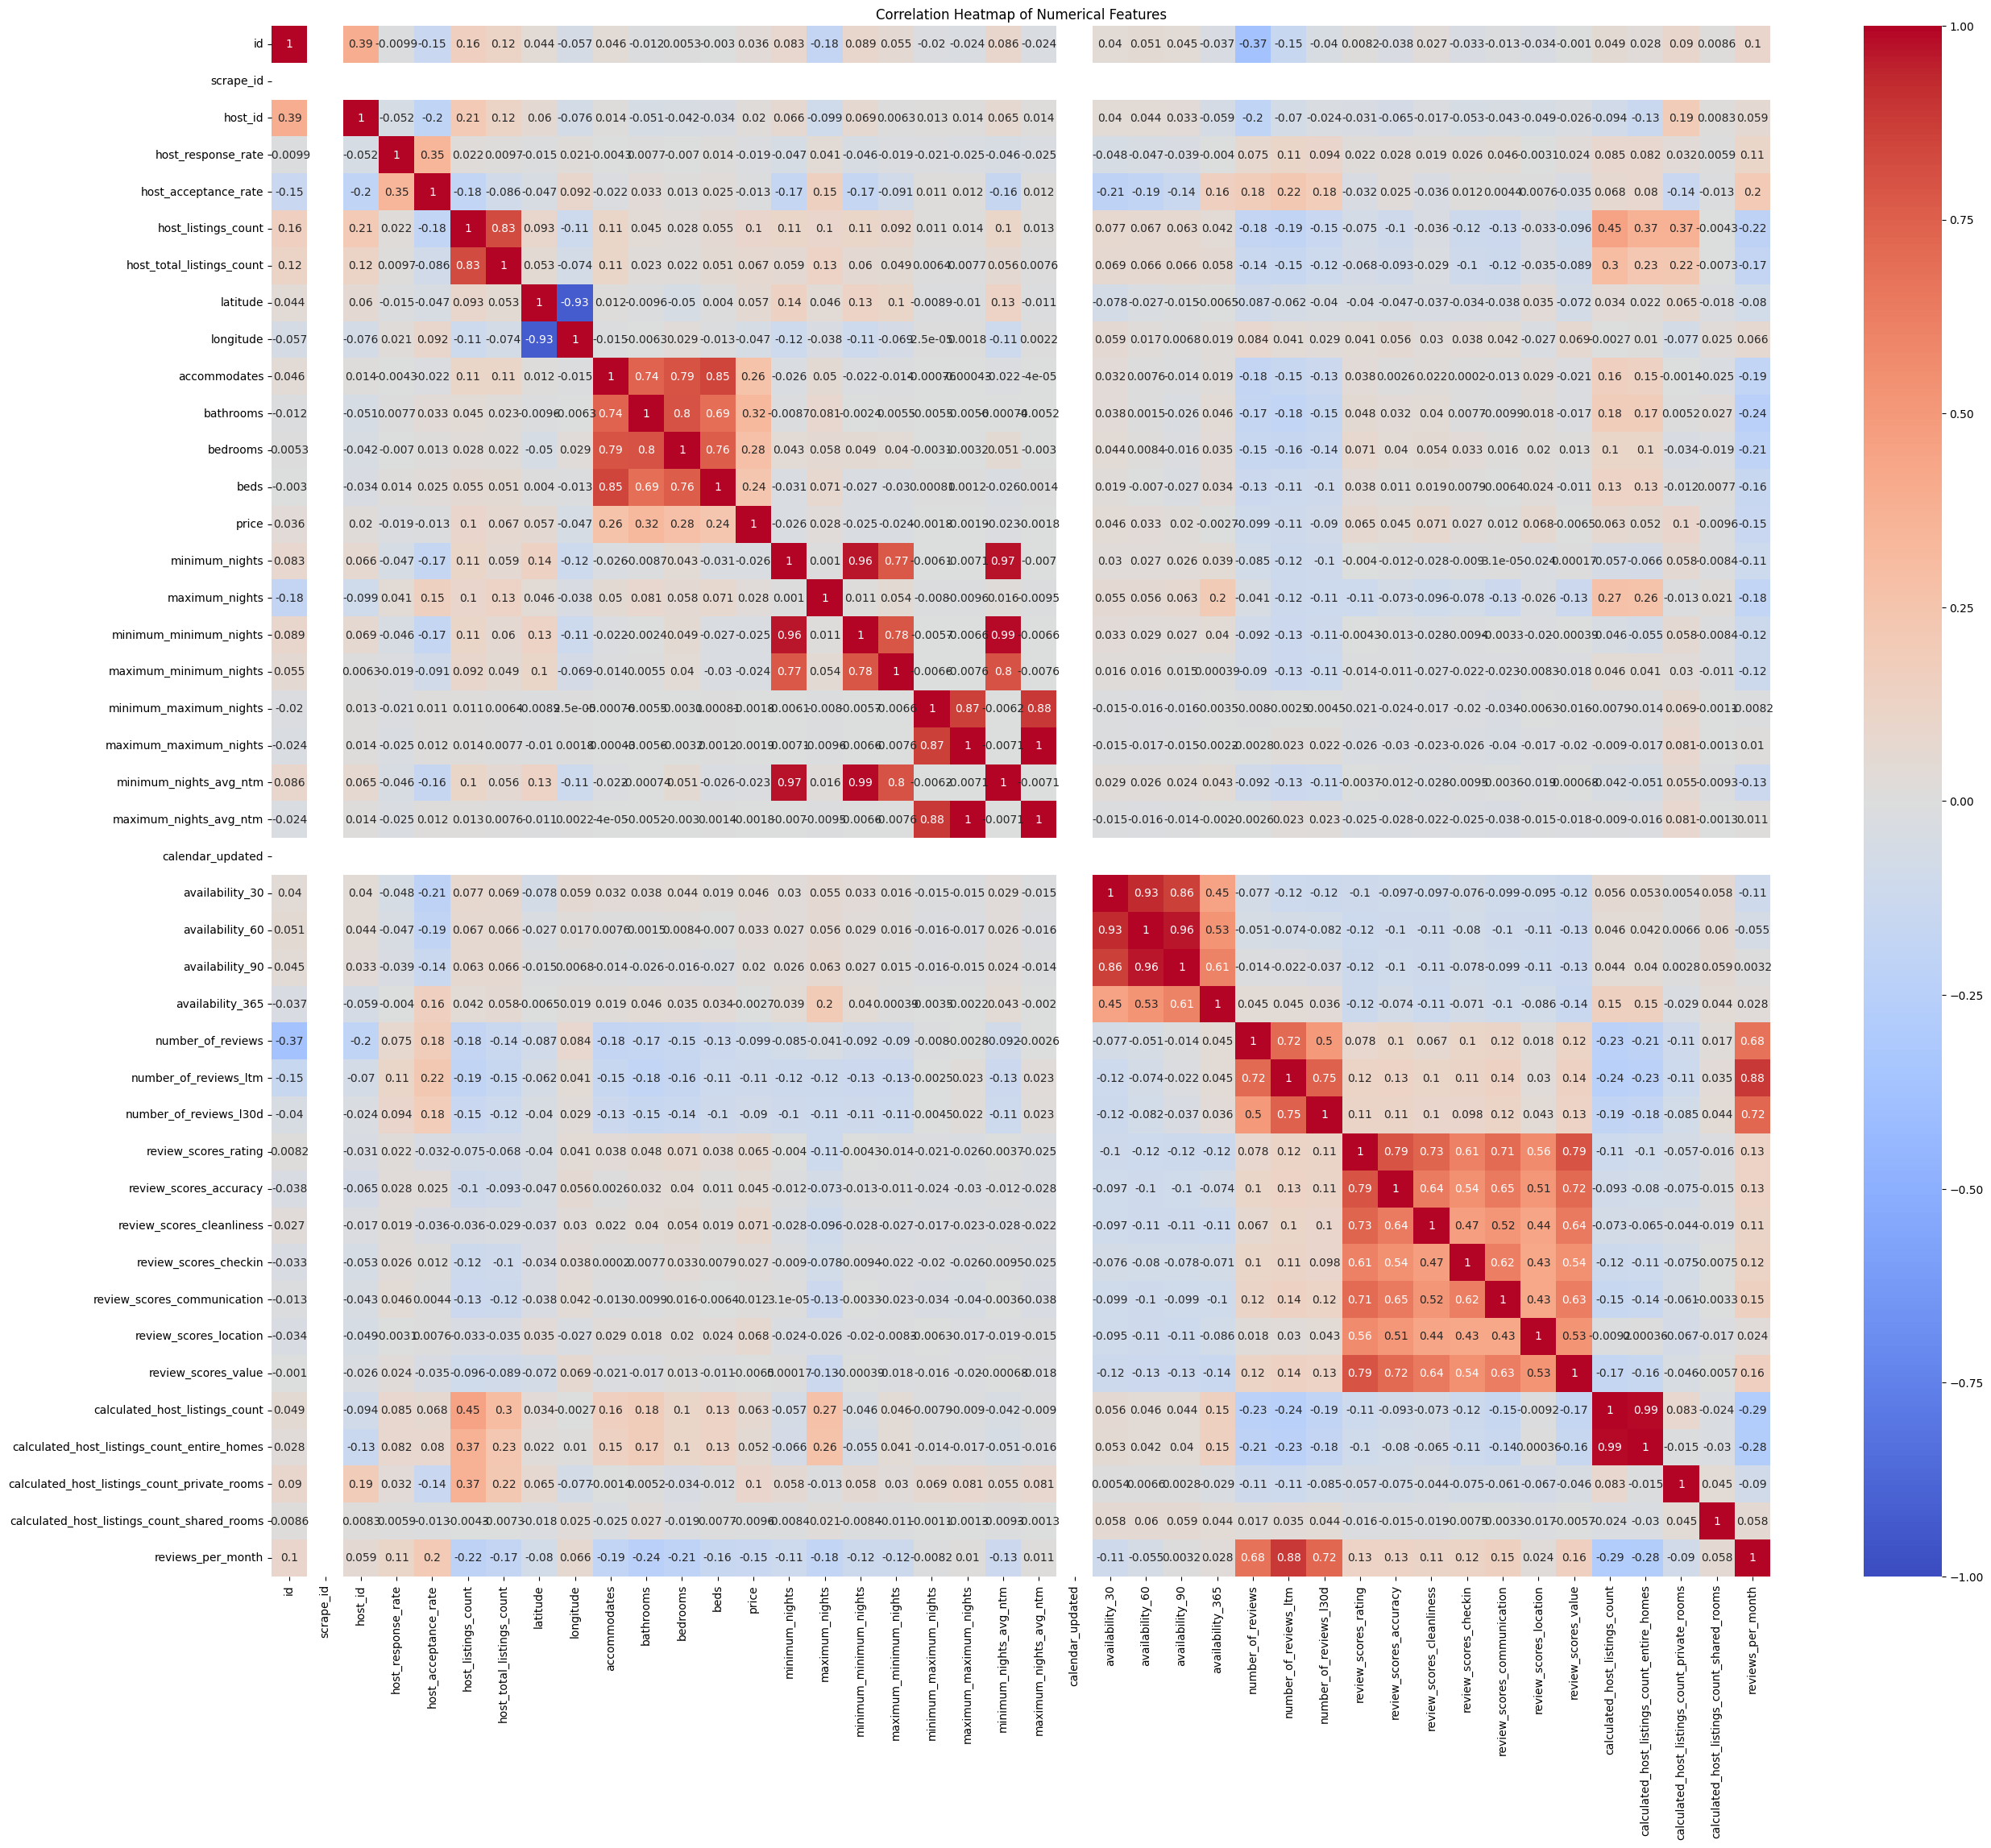

In [5]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = airbnb.select_dtypes(include=['float64', 'int64']).columns.tolist()

correlation_matrix = airbnb[numerical_cols].corr()

plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [4]:
#Checking for multicolinearity
import pandas as pd
import numpy as np

# Example DataFrame
airbnb = pd.read_csv("listings-2.csv")

#Drop columns with web scraping metadata, columns with multicollinearity, and text (will handle text data separately)
columns_to_drop = [
    'listing_url', 'scrape_id', 'last_scraped', 'source', 
    'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url',
    'calendar_updated', 'calendar_last_scraped', 'bathrooms_text',"name", 
    "description", "neighborhood_overview", "host_name", "host_about", "amenities",
]
airbnb.drop(columns=columns_to_drop, inplace=True, errors='ignore')

#Rename columns for clarification
airbnb.rename(columns={
    'neighbourhood_cleansed': 'neighborhood',
    'neighbourhood_cleansed_group': 'island'
}, inplace=True)

#Convert date columns to datetime
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'], errors='coerce')
airbnb['first_review'] = pd.to_datetime(airbnb['first_review'], errors='coerce')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], errors='coerce')

# Feature engineering: Extract relevant time-based features
airbnb['host_since_year'] = airbnb['host_since'].dt.year
airbnb['host_since_month'] = airbnb['host_since'].dt.month
airbnb['host_since_day'] = airbnb['host_since'].dt.day
airbnb['host_since_weekday'] = airbnb['host_since'].dt.weekday

airbnb['first_review_year'] = airbnb['first_review'].dt.year
airbnb['last_review_year'] = airbnb['last_review'].dt.year

# Extract month from 'first_review' and 'last_review'
airbnb['first_review_month'] = airbnb['first_review'].dt.month
airbnb['last_review_month'] = airbnb['last_review'].dt.month

# Calculate the days since last review
airbnb['days_since_last_review'] = (pd.to_datetime('today') - airbnb['last_review']).dt.days

#Remove percentage and dollar sign symbols, then convert to floats
airbnb['host_response_rate'] = airbnb['host_response_rate'].replace({'%': ''}, regex=True).astype(float) / 100
airbnb['host_acceptance_rate'] = airbnb['host_acceptance_rate'].replace({'%': ''}, regex=True).astype(float) / 100
airbnb['price'] = airbnb['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)


#Numerical columns
numerical_cols = airbnb.select_dtypes(include=['int', 'float64']).columns.tolist()

correlation_matrix = airbnb[numerical_cols].corr()

# Set a correlation threshold
threshold = 0.9

# Identify and drop highly correlated features
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[j]
            to_drop.add(colname)

# Drop highly correlated features
airbnb_reduced = airbnb.drop(columns=to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to high correlation: {to_drop}")


Columns dropped due to high correlation: {'minimum_nights_avg_ntm', 'availability_90', 'calculated_host_listings_count_entire_homes', 'maximum_nights_avg_ntm', 'longitude', 'availability_60', 'days_since_last_review', 'minimum_minimum_nights', 'host_since_year'}


We see most of the columns have fairly weak correlation with each other. There are some darker spots on the heatmap indicating stronger correlation, but upon further inspection, those columns are often related to each other such as minimum_nights and minimum_night_avg. We need to remove one of the pair to ensure against multicollinearity.

#### Plot Distributions of Numeric Variables

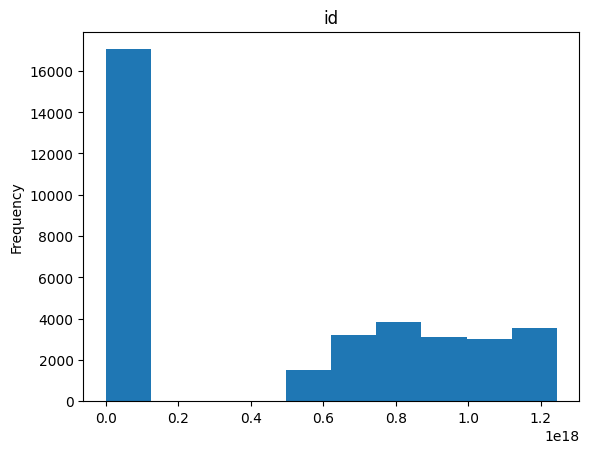

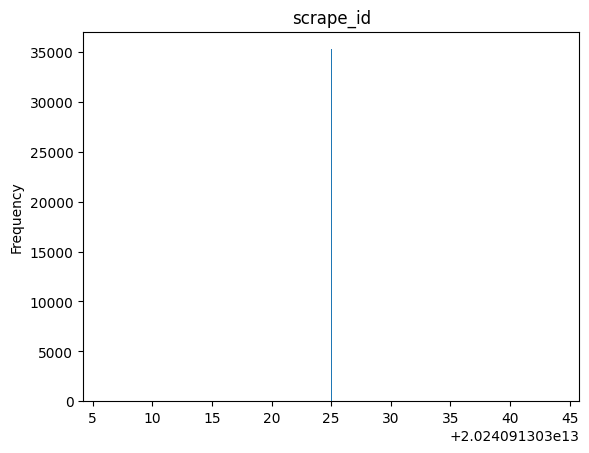

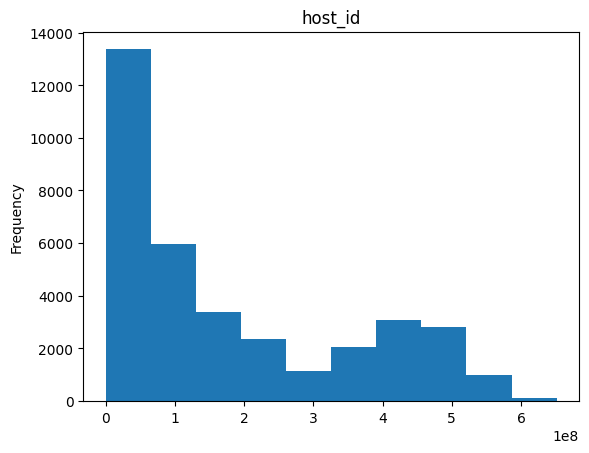

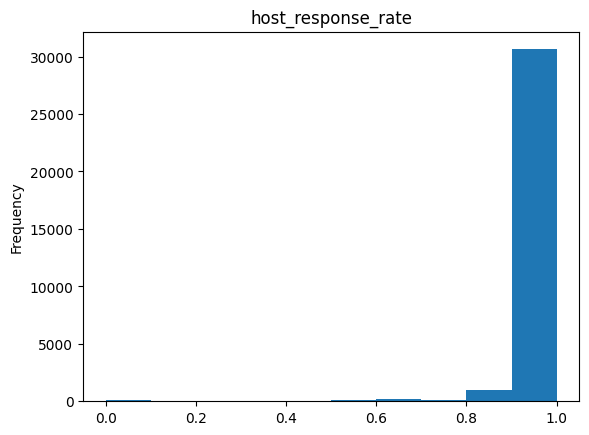

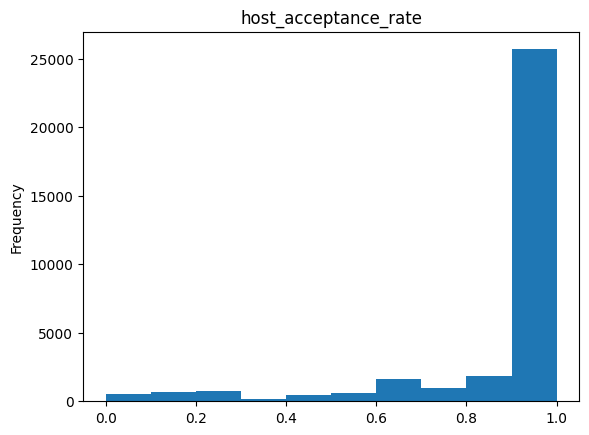

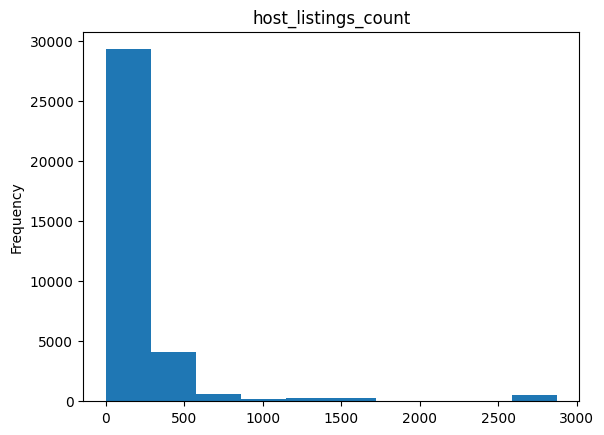

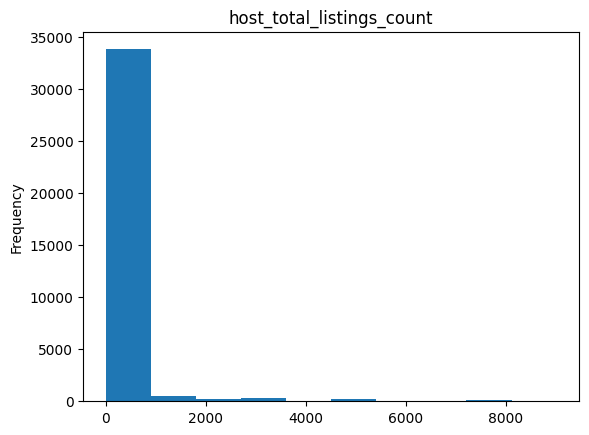

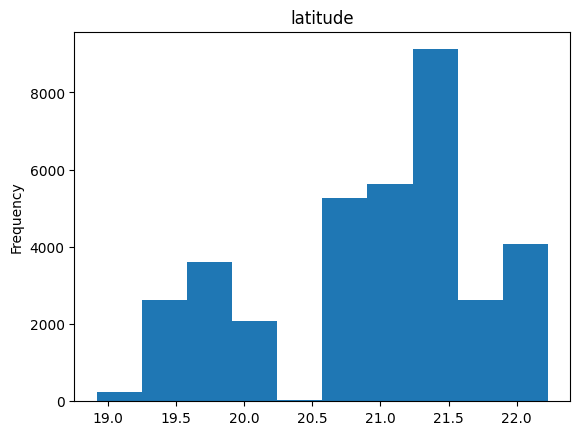

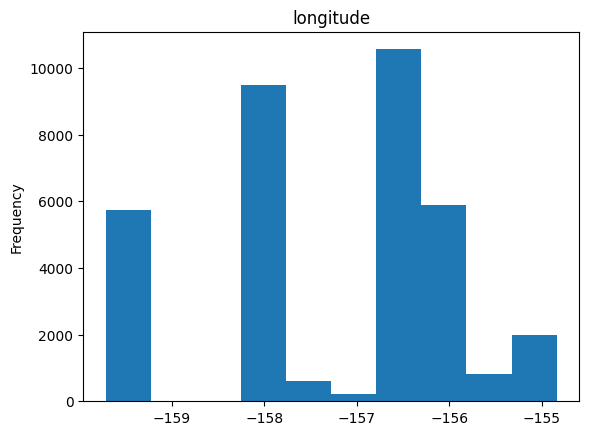

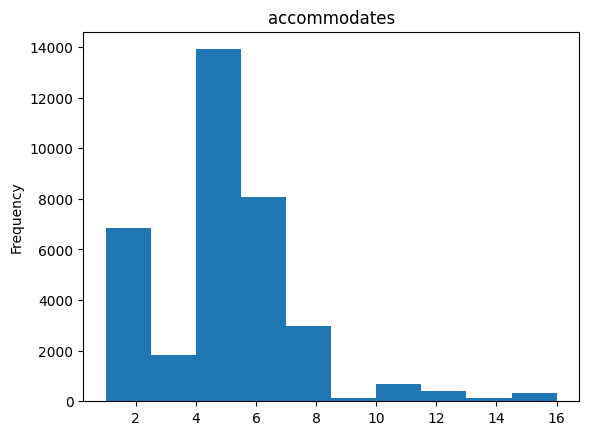

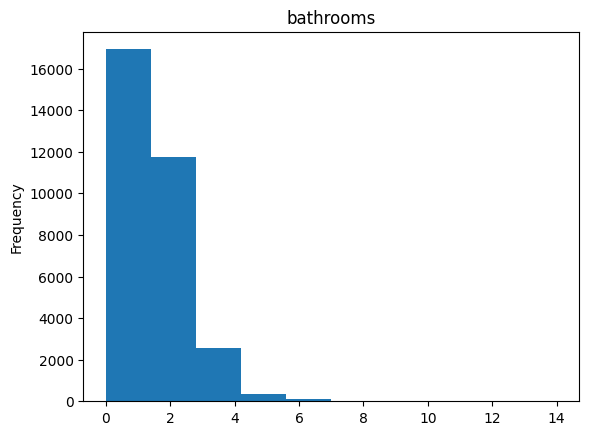

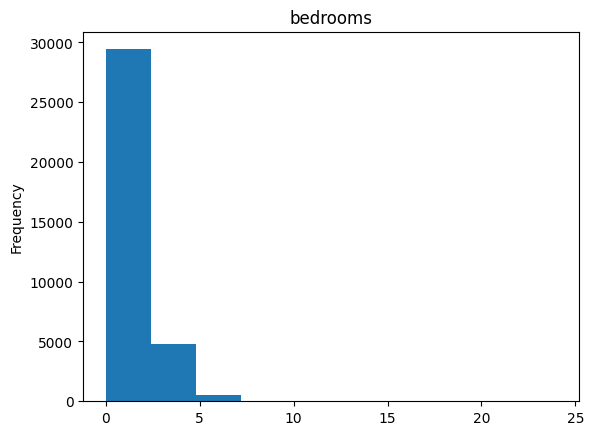

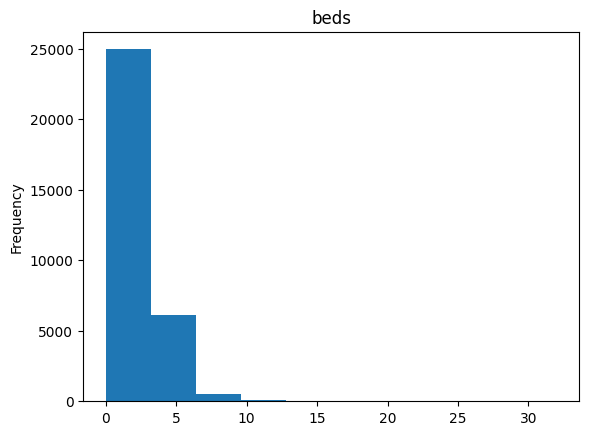

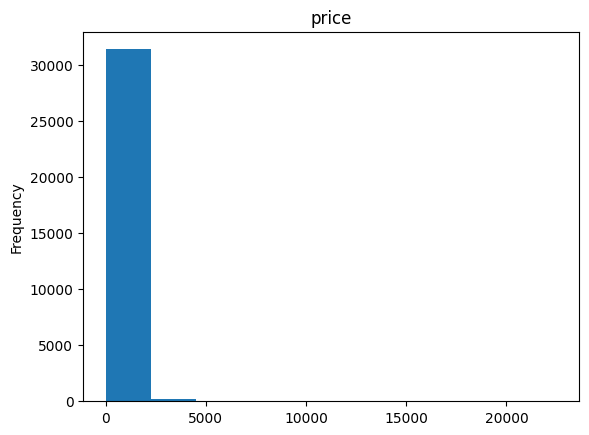

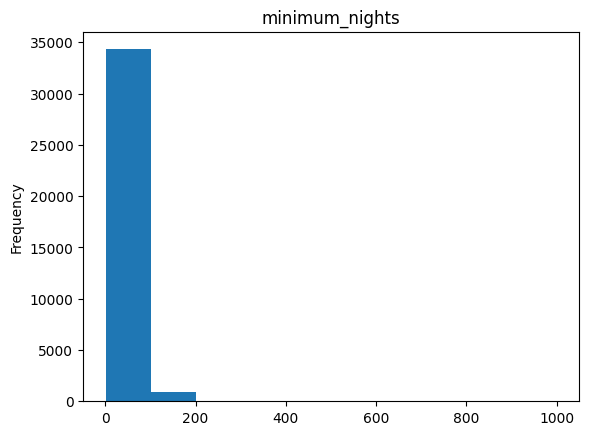

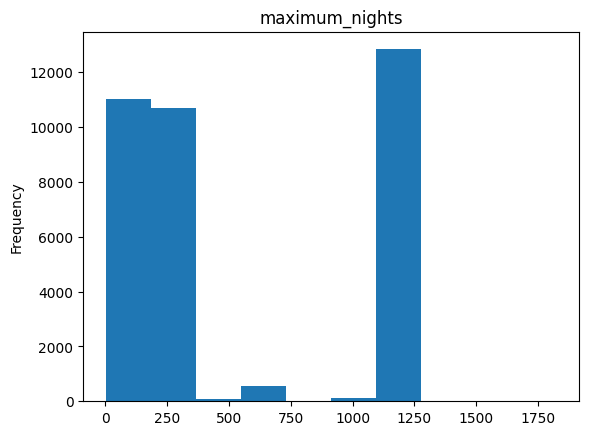

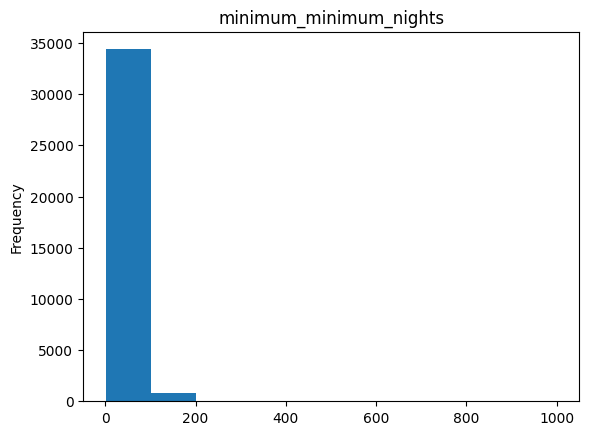

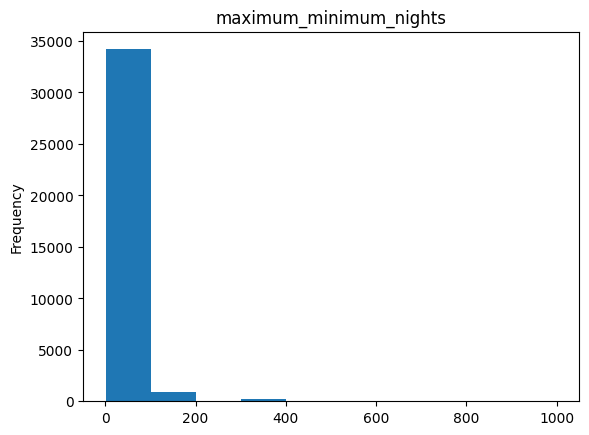

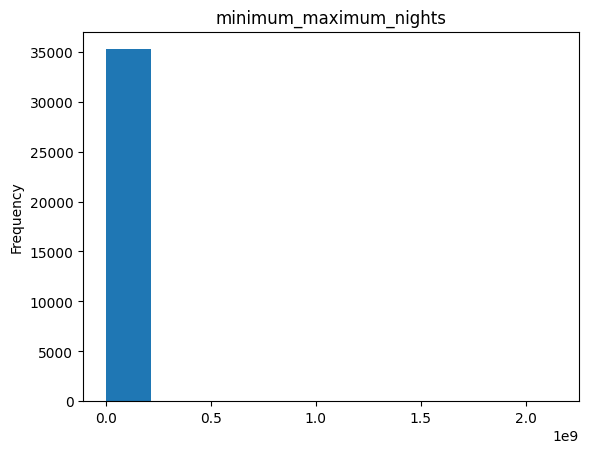

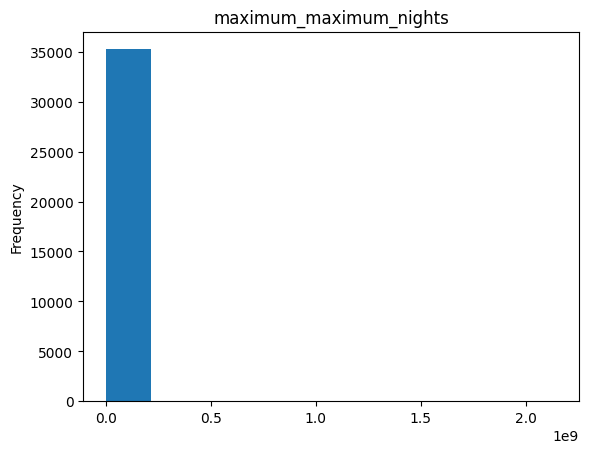

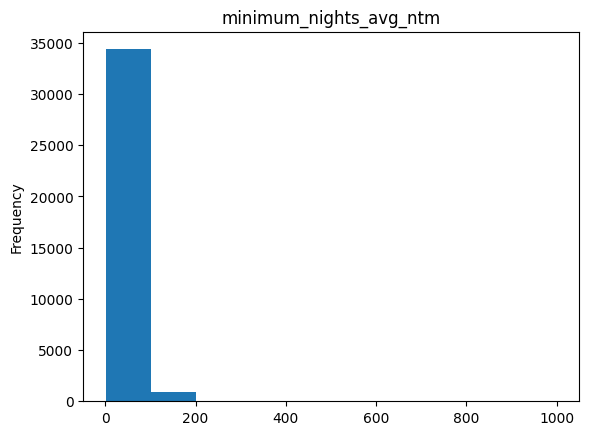

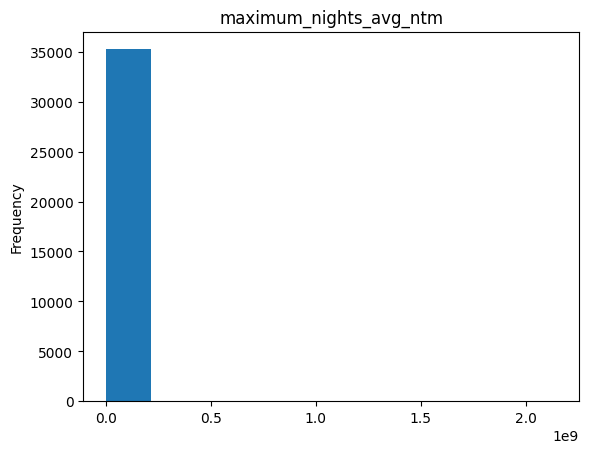

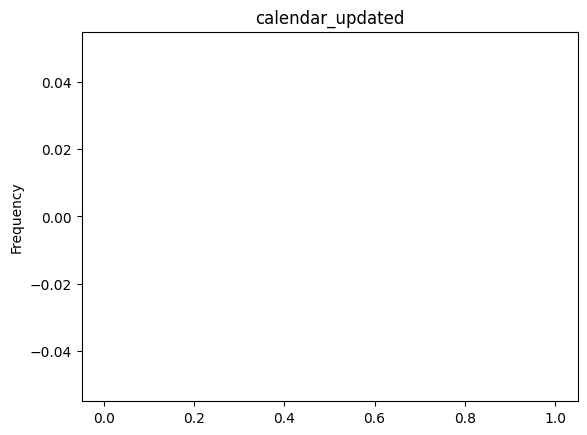

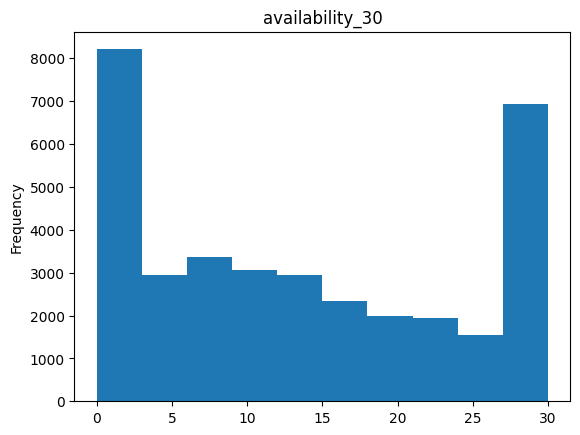

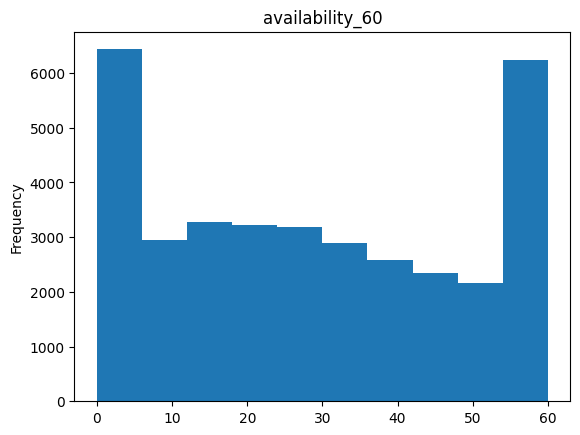

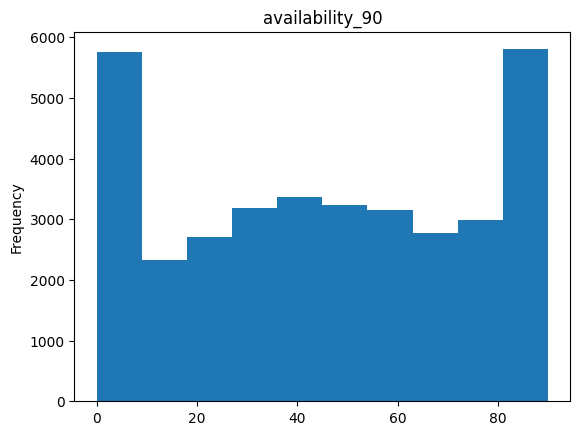

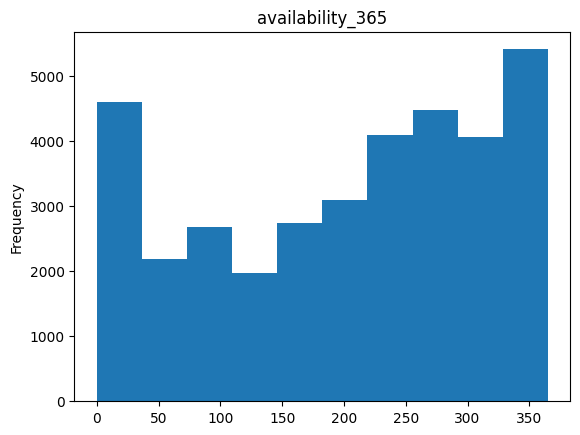

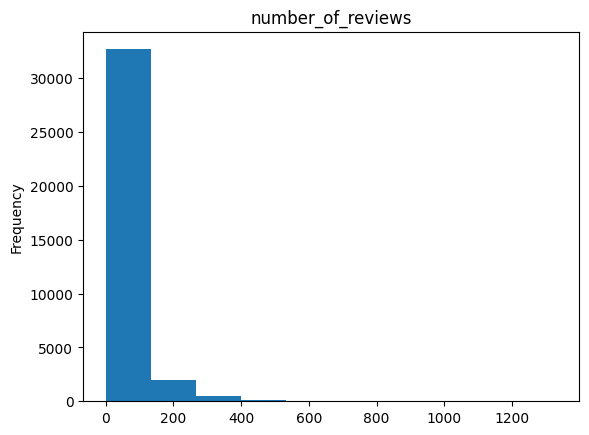

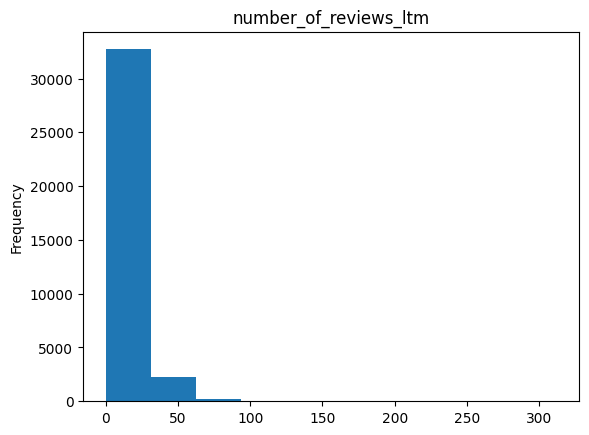

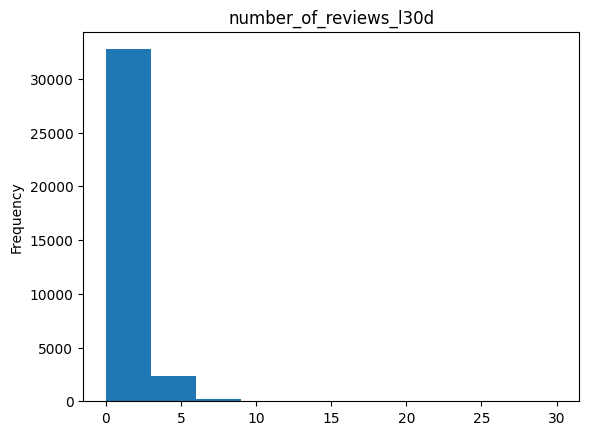

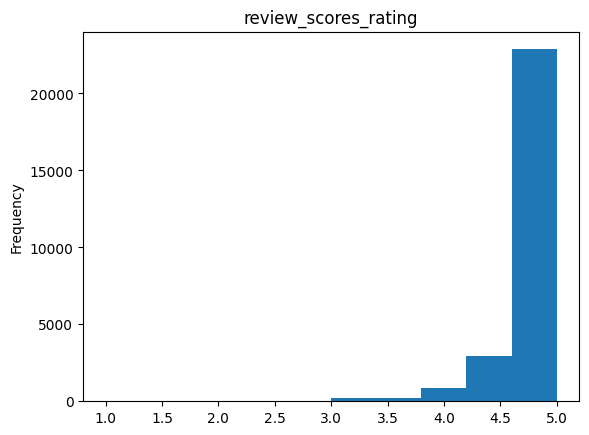

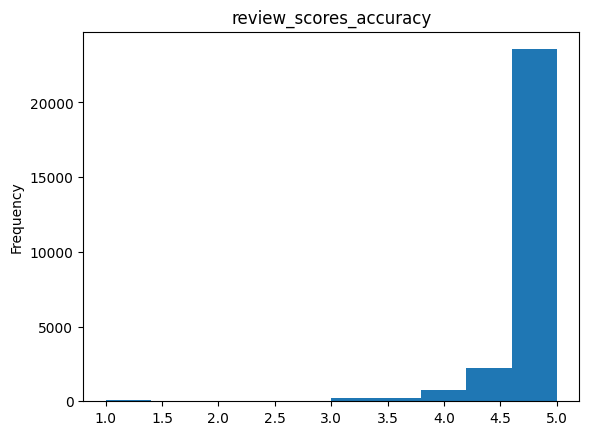

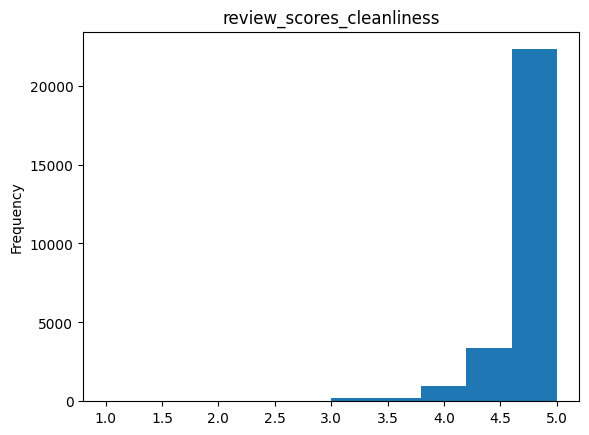

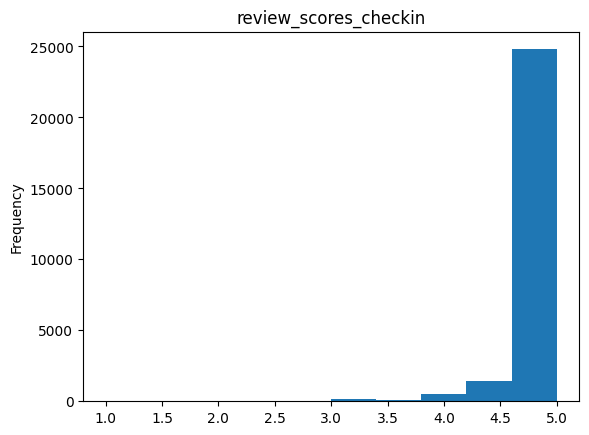

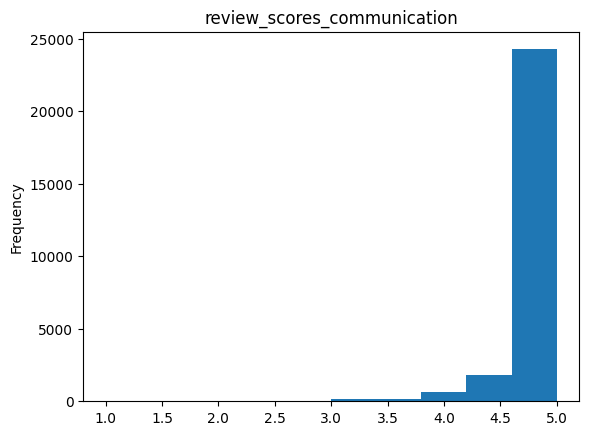

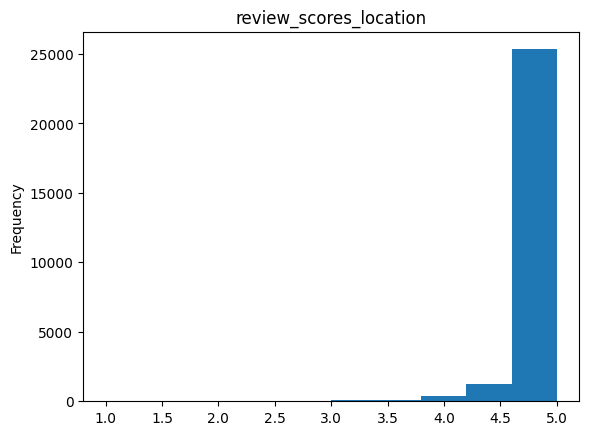

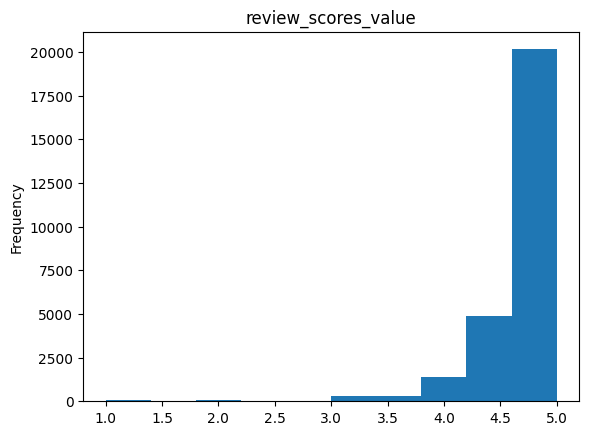

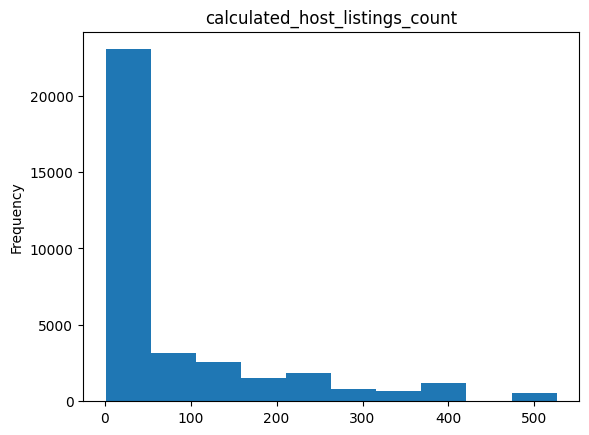

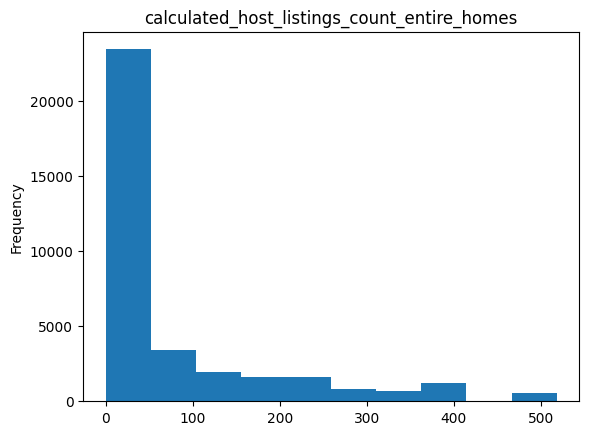

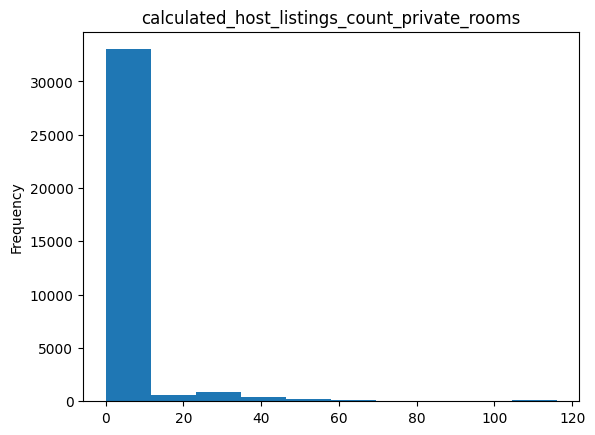

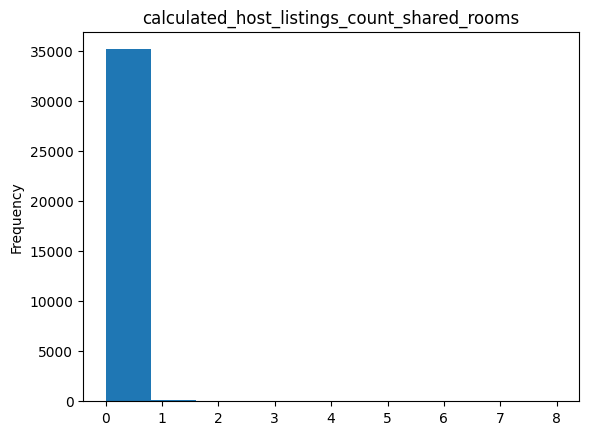

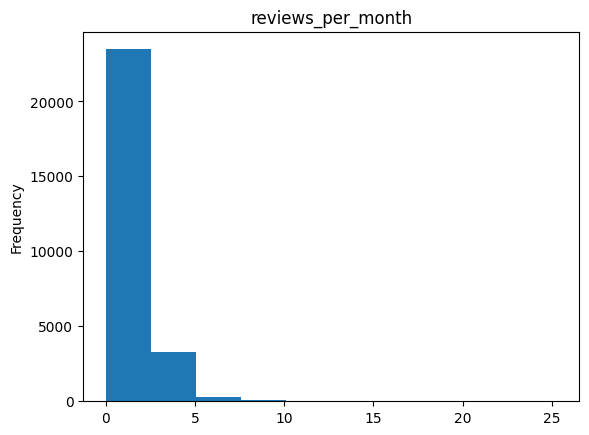

In [6]:
import matplotlib.pyplot as plt

for column in numerical_cols:
    airbnb[column].plot.hist()
    plt.title(column)
    plt.show() 

##### Some interesting distributions of note:

We found that the data dictionary did not really distinguish between host_listings_count and host_total_listings_count but we noticed what appeared to be some really large values in host_listings_count in the 2500-3000 bucket which seems very unusual. Perhaps large companies are buying up and renting out entire buildings, but this variable is something we will want to keep an eye on in terms of potential fraud. Additionally, the distribution for calculated_host_listings_county_entire_homes is very right skewed, with some hosts claiming to rent out more than 500 individual homes, which seems especially large considering how small the Hawaiian islands are.

Another interesting distribution of note was review_scores_accuracy which measures the accuracy of the listing compared to the real experience. There we some 1 star reviews which tell us that listings were entirely misleading, which could be considered fraud.

The maximum_minimum_nights variable stood out for having potential outliers at around 400 nights. Airbnb is primarily know for short term vacation rentals, so it's a bit strange to see certain listings having a minimum stay requirements of about a year, which is basically a lease at that point. Perhaps landlords are trying to get around rental regulations by listing their properties on Airbnb where they might be subject to fewer rules. This could also be considered fraud.

Lastly, when evaluating the distribution of bedrooms and bathrooms in the data, we noticed that certain listings actually list zero as the number of bedrooms and bathrooms, which made us wonder what actually qualifies as a listing since these amenities seem like the bare minimum.

#### Evalaute Desciptive Statistics

In [7]:
#Drop metadata columns

numerical_cols = airbnb.select_dtypes(include=['float64', 'int64'])

columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_thumbnail_url', 'host_picture_url', 
'calendar_updated', 'calendar_last_scraped']

numerical_cols_cleaned = numerical_cols.drop(columns=columns_to_drop, errors='ignore')

numerical_cols_cleaned.describe()



,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.529500e+04,3.529500e+04,32324.000000,33233.000000,35293.000000,35293.000000,35295.000000,35295.000000,35295.000000,31760.000000,...,27127.000000,27125.000000,27127.000000,27126.000000,27126.000000,35295.000000,35295.000000,35295.000000,35295.000000,27138.000000
mean,4.659985e+17,1.815159e+08,0.976384,0.888695,173.115462,266.622276,20.901013,-157.203703,4.747528,1.628763,...,4.766933,4.849183,4.835128,4.867036,4.679713,78.111999,73.716929,2.935288,0.008103,1.137002
std,4.724993e+17,1.745497e+08,0.092417,0.222348,397.744912,802.924960,0.814169,1.282784,2.403644,0.904326,...,0.342493,0.307386,0.329644,0.238593,0.386031,117.388570,116.513400,11.116730,0.168299,1.301236
min,5.269000e+03,9.080000e+02,0.000000,0.000000,1.000000,1.000000,18.920250,-159.714620,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.656239e+07,3.783914e+07,0.990000,0.920000,3.000000,4.000000,20.686771,-157.839425,4.000000,1.000000,...,4.680000,4.830000,4.800000,4.830000,4.590000,2.000000,1.000000,0.000000,0.000000,0.220000
50%,5.724819e+17,1.118173e+08,1.000000,0.990000,28.000000,35.000000,20.958320,-156.691060,4.000000,1.000000,...,4.870000,4.940000,4.940000,4.930000,4.770000,20.000000,13.000000,0.000000,0.000000,0.660000
75%,9.071696e+17,3.400801e+08,1.000000,1.000000,214.000000,277.000000,21.309895,-156.338140,6.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.910000,110.000000,91.000000,0.000000,0.000000,1.670000
max,1.243835e+18,6.515171e+08,1.000000,1.000000,2872.000000,9020.000000,22.229090,-154.841000,16.000000,14.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,526.000000,518.000000,116.000000,8.000000,25.250000


The descriptive statistics corroborate what we saw when we plotted the distributions. The max host_listings_count is 2872 and the max host_total_listings_count is 9020, which certainly prompts further research into these companies to verify that they are large companies. Interestingly the minimum number of bathrooms listed is zero, which means that at least one property claims to have no bathrooms, which seems like it should not qualify as a listing. Price is another variable which stands our for having a wide range of values, from 8 - 22500 dollars per night, with a median of $228.

#### Identify Potential Outlier Listings

##### Hosts with many listings

In [8]:
many_listings = airbnb[airbnb['host_listings_count'] > 500]
host_listings_ids = many_listings['host_id'].unique()
host_listings_ids

array([ 30787515,  39073224,  31214940, 387445762, 395672427,  20704144,
        20120594, 341272083, 373307437, 174792040,   5615582,  25138314,
       389697794, 411546857, 119070668, 373042041, 442029804, 482174715,
       326084746, 496944100, 501999278, 501999514, 456511812, 495439249,
       509915863, 480237365])

In [9]:
filtered_hosts = airbnb[airbnb['host_id'].isin(host_listings_ids)]
filtered_hosts

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1438,7496523,https://www.airbnb.com/rooms/7496523,20240913025425,2024-09-14,city scrape,Ka'anapali Beach Club-1 bdrm,Enjoy your exotic island vacation at Ka'anapal...,NaN,https://a0.muscache.com/pictures/95034517/f42f...,30787515,...,4.82,4.87,4.66,"440010980314, TA-148-664-9856-01",f,45,44,1,0,0.35
1700,9754778,https://www.airbnb.com/rooms/9754778,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Honua Kai Hokulani 1022,Hokulani 1022 provides panoramic views of the ...,Honua Kai occupies 38 pristine beachfront acre...,https://a0.muscache.com/pictures/prohost-api/H...,39073224,...,4.93,4.93,4.57,"440140060316, TA-113-706-4960-01",t,526,518,8,0,0.14
1701,9754782,https://www.airbnb.com/rooms/9754782,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Honua Kai Hokulani 929,Breathtaking 9th floor ocean views and an expa...,Honua Kai occupies 38 pristine beachfront acre...,https://a0.muscache.com/pictures/prohost-api/H...,39073224,...,4.86,5.00,4.86,"440140060309, TA-000-846-8992-01",t,526,518,8,0,0.14
1702,9754788,https://www.airbnb.com/rooms/9754788,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Honua Kai Hokulani 937,With sweeping 9th floor ocean views that gaze ...,Honua Kai occupies 38 pristine beachfront acre...,https://a0.muscache.com/pictures/31924668-a8c2...,39073224,...,4.00,5.00,3.80,"440140060314, TA-194-672-4864-01",t,526,518,8,0,0.05
1703,9754799,https://www.airbnb.com/rooms/9754799,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Kaanapali Alii 432 Oceanview,The interior setting of this suite affords pri...,NaN,https://a0.muscache.com/pictures/1aeeacf1-a28a...,39073224,...,5.00,5.00,4.67,"440080220212, TA-014-128-7424-01",t,526,518,8,0,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35191,1240071861978537474,https://www.airbnb.com/rooms/1240071861978537474,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Honua Kai Hokulani 540/42,Enjoy one of the best values to be had at Honu...,Honua Kai occupies 38 pristine beachfront acre...,https://a0.muscache.com/pictures/prohost-api/H...,39073224,...,NaN,NaN,NaN,"440140060193, TA-175-718-1952-01",t,526,518,8,0,NaN
35241,1239243067189852006,https://www.airbnb.com/rooms/1239243067189852006,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Honua Kai Konea 531,Nestled in one of the most desirable columns o...,Honua Kai occupies 38 pristine beachfront acre...,https://a0.muscache.com/pictures/prohost-api/H...,39073224,...,NaN,NaN,NaN,"440140060499, TA-175-718-1952-01",t,526,518,8,0,NaN
35257,1239302680391578347,https://www.airbnb.com/rooms/1239302680391578347,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Honua Kai Hokulani 540,Featuring a spacious interior and beautiful vi...,Honua Kai occupies 38 pristine beachfront acre...,https://a0.muscache.com/pictures/prohost-api/H...,39073224,...,NaN,NaN,NaN,"440140060191, TA-175-718-1952-01",t,526,518,8,0,NaN
35259,1239335419545135160,https://www.airbnb.com/rooms/1239335419545135160,20240913025425,2024-09-14,city scrape,Maui Resort Rentals: Honua Kai Konea 336,Offering beautiful views of the tranquil Pacif...,Honua Kai occupies 38 pristine beachfront acre...,https://a0.muscache.com/pictures/prohost-api/H...,39073224,...,NaN,NaN,NaN,"440140060499, TA-175-718-1952-01",t,526,518,8,0,NaN


Upon filtering the host id for hosts tied to more than 500 properties, we looked into some of the profile pages and found hosts like Brooke, who had a bio that said "Worked for the last 16 years matching vacations with those that love to vacation.  I specialize in budget vacations with high quality properties.  I enjoy movies, swimming and dining.  I have 2 grown kids and I love bulldogs." Brooke seems like she may be a property manager because her listings include properties in different states and many of them seem to be condos in the same building. It is not clear whether she belongs to a larger organization.

Additionally we did find that some of these hosts were rentals companies, like "Maui Resort Rentals", which we would expect to have more listings.

##### Properties with Zero Bathrooms

In [10]:
no_bathooms = airbnb[airbnb['bathrooms'] == 0]
no_bathooms

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,7888,https://www.airbnb.com/rooms/7888,20240913025425,2024-09-13,city scrape,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We offer a medium term rental requiring a mini...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,22083,...,4.76,4.25,4.60,GE-104-390-7584-01,f,1,1,0,0,0.74
464,1633034,https://www.airbnb.com/rooms/1633034,20240913025425,2024-09-13,city scrape,Cozy Jacaranda Room,"Rustic, country coffee & fruit farm getaway. R...",Centrally located near many attractions includ...,https://a0.muscache.com/pictures/4de63c8f-67c2...,8536565,...,4.89,4.85,4.88,NaN,f,4,1,3,0,1.02
470,1633101,https://www.airbnb.com/rooms/1633101,20240913025425,2024-09-13,city scrape,Plumeria Room with Ocean View,"Rustic, country farm getaway. Relax on a seclu...",Centrally located near many attractions includ...,https://a0.muscache.com/pictures/30639630-9ddc...,8536565,...,4.89,4.84,4.74,NaN,f,4,1,3,0,0.55
520,2012496,https://www.airbnb.com/rooms/2012496,20240913025425,2024-09-13,city scrape,"Banana Patch Cottage, a tiny, rainforest gem!","SETTLE. STRENGTHEN. The Banana Patch cottage, ...",Wailea is a quaint old plantation village of a...,https://a0.muscache.com/pictures/miso/Hosting-...,6782149,...,4.97,4.85,4.95,NaN,f,6,3,3,0,0.36
1198,6505648,https://www.airbnb.com/rooms/6505648,20240913025425,2024-09-13,city scrape,Puna Rainforest Retreat Hotspring,Enjoy the solitude of Hawaii's rainforest on a...,We live in a very safe neighborhood and have a...,https://a0.muscache.com/pictures/hosting/Hosti...,25115999,...,4.99,4.82,4.90,NaN,f,6,6,0,0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34733,1223244636206533901,https://www.airbnb.com/rooms/1223244636206533901,20240913025425,2024-09-14,city scrape,Maui Westin Villa North studio,Step up to a luxurious tropical vacation on Ma...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,574081992,...,NaN,NaN,NaN,Exempt,t,2,1,1,0,NaN
34917,1228312828374448049,https://www.airbnb.com/rooms/1228312828374448049,20240913025425,2024-09-14,city scrape,New_Ilikai Hotel with Free Parking,It's just started a new liting.<br /><br />Thi...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,208923666,...,NaN,NaN,NaN,"260100070152, 927, TA-072-142-6944-01",t,42,29,13,0,NaN
34933,1231420150345803432,https://www.airbnb.com/rooms/1231420150345803432,20240913025425,2024-09-13,city scrape,Aloha Smart Camper,Maui Airport Camper: Your Perfect Journey Star...,-- MAUI AIRPORT LOCATION<br />We’re located di...,https://a0.muscache.com/pictures/miso/Hosting-...,5042700,...,NaN,NaN,NaN,"092678411201, TA-092-687-4112-01",t,1,1,0,0,NaN
34939,1231500939364829982,https://www.airbnb.com/rooms/1231500939364829982,20240913025425,2024-09-13,city scrape,Tiny House on Maui,Maui Airport Camper: Your Perfect Journey Star...,-- MAUI AIRPORT LOCATION<br />We’re located di...,https://a0.muscache.com/pictures/miso/Hosting-...,443754126,...,NaN,NaN,NaN,"092678411201, TA-092-687-4112-01",t,1,1,0,0,NaN


Upon inspecting the 137 results that had no bathroom, we realized the variable was misleading. In most cases, the listings are for private rooms which have no private bath, which is why bathrooms is listed as zero. However, you can see in the pictures that there are indeed bathrooms on the premises.

##### Properties by Price (Lowest and Highest Percentiles)

In [20]:
expensive_listings = airbnb[airbnb['price'] > 10000 ]
expensive_listings[["id", "listing_url", "price"]]

,id,listing_url,price
4405,20475538,https://www.airbnb.com/rooms/20475538,15800.0
6417,27734308,https://www.airbnb.com/rooms/27734308,22500.0
9089,37831235,https://www.airbnb.com/rooms/37831235,12000.0
13639,49295387,https://www.airbnb.com/rooms/49295387,11648.0
18700,625903401168377430,https://www.airbnb.com/rooms/625903401168377430,15000.0
23423,798559693718257556,https://www.airbnb.com/rooms/798559693718257556,20000.0
23424,798559771649808426,https://www.airbnb.com/rooms/798559771649808426,20000.0
23425,798560145850120283,https://www.airbnb.com/rooms/798560145850120283,20000.0
23426,798560192854306780,https://www.airbnb.com/rooms/798560192854306780,20000.0
23427,798560246791497699,https://www.airbnb.com/rooms/798560246791497699,20000.0


Evaluating the upper end of the price range, there are of course a few massive villas which claim to sleep more than 16 people and are located on pristine beaches. The most expensive property on this list at 22500 dollars per night no longer exists on Airbnb's website. At the next most expensive price, 20000 dollars per night, listing 798559693718257556 links to a fairly normal 1-bedroom hotel suite, which does not have any upcoming availability for us to be able to verify the price. It could potentially be a data entry error, but many of the other 20k listings are hosted by the same host named Jenna and seem to be rooms at the same few hotels, which is interesting.

In [11]:
cheap_listings = airbnb[airbnb['price'] < 20 ]
cheap_listings[["id", "listing_url", "price"]]

,id,listing_url,price
500,1750621,https://www.airbnb.com/rooms/1750621,10.0
6371,27574865,https://www.airbnb.com/rooms/27574865,10.0
8259,34092051,https://www.airbnb.com/rooms/34092051,19.0
9418,38883632,https://www.airbnb.com/rooms/38883632,19.0
9757,40086949,https://www.airbnb.com/rooms/40086949,10.0
14530,50806760,https://www.airbnb.com/rooms/50806760,15.0
32573,1143027247415683328,https://www.airbnb.com/rooms/1143027247415683328,15.0
32789,1146593018538305384,https://www.airbnb.com/rooms/1146593018538305384,15.0
33135,1161950940351599216,https://www.airbnb.com/rooms/1161950940351599216,10.0
33187,1159999031034754968,https://www.airbnb.com/rooms/1159999031034754968,8.0


Interestingly there are 12 listings which appear in our data as priced below $20/night. However, when we visited some of the links, these properties were very nice and much more expensive, like id #1750621 which has a minimum stay of 1 month and will set you back about 5000 dollars per month. 

There are other properties with longer terms minimum stays, like #50806760 which is just an enclosed hut with a sofa bed and does indeed cost $15 per night over a 20 day minimum stay.

#### Categorical Column Exploration

We want to handle our categorical columns differently. We will perform some text mining on the listing names and descriptions and then we will encode the column which might only have a few types.

In [12]:
categorical_cols = airbnb.select_dtypes(include=['object'])

columns_to_encode = ["host_location","host_is_superhost","host_neighbourhood","host_verifications","host_has_profile_pic","host_identity_verified","neighbourhood_cleansed", "neighbourhood_group_cleansed",
"property_type", "room_type", "has_availability", "instant_bookable"]

text_columns = ["name", "description", "neighborhood_overview", "host_name", "host_about", "amenities"]

In [13]:
#View columns to encode
categorical_cols[columns_to_encode]

,host_location,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,has_availability,instant_bookable
0,"Waimea, HI",t,Island of Hawaiʻi,"['email', 'phone']",t,t,South Kohala,Hawaii,Entire rental unit,Entire home/apt,t,f
1,"Captain Cook, HI",t,Kailua/Kona,"['email', 'phone']",t,t,South Kona,Hawaii,Entire rental unit,Entire home/apt,t,t
2,"Pāhoa, HI",f,Island of Hawaiʻi,"['email', 'phone']",t,f,Puna,Hawaii,Private room in cabin,Private room,t,f
3,"Waialua, HI",f,NaN,"['email', 'phone', 'work_email']",t,f,North Shore Oahu,Honolulu,Entire home/apt,Entire home/apt,t,f
4,"Pahoa, HI",f,Island of Hawaiʻi,"['email', 'phone']",t,t,Puna,Hawaii,Entire home,Entire home/apt,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...
35290,"Houston, TX",f,La Isla,"['email', 'phone', 'work_email']",t,t,Ewa,Honolulu,Entire rental unit,Entire home/apt,t,t
35291,"Honolulu, HI",f,Kuliouou - Kalani Iki,"['email', 'phone']",t,t,North Shore Oahu,Honolulu,Entire home,Entire home/apt,t,f
35292,"Honolulu, HI",NaN,Waikiki,"['email', 'phone']",t,t,Primary Urban Center,Honolulu,Entire rental unit,Entire home/apt,t,f
35293,"Honolulu, HI",f,Waikiki,"['email', 'phone']",t,t,Primary Urban Center,Honolulu,Entire condo,Entire home/apt,t,t


##### Term Frequency in Listing Descriptions

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#Initialize dictionary
top_terms_per_column = {}

# Loop through each column to apply TF-IDF
for col in text_columns:
   
    vectorizer = TfidfVectorizer(stop_words="english")

    tfidf_matrix = vectorizer.fit_transform(airbnb[col].fillna(''))
    
    feature_names = vectorizer.get_feature_names_out()
    sums = tfidf_matrix.sum(axis=0)
    
    data = [(term, sums[0, idx]) for idx, term in enumerate(feature_names)]
    ranking = pd.DataFrame(data, columns=['term', 'rank']).sort_values('rank', ascending=False)
    
    top_terms_per_column[col] = ranking.head(10)

for col, top_terms in top_terms_per_column.items():
    print(f"\nTop terms for column '{col}':\n", top_terms)



Top terms for column 'name':
          term         rank
6975    ocean  1425.045058
3036    beach  1395.925482
3091  bedroom  1139.954502
8916     view  1112.242715
3604    condo  1030.974647
7839   resort   992.739411
8439   studio   903.548559
8997  waikiki   871.292849
7515     pool   762.374800
8923    views   703.296714

Top terms for column 'description':
           term         rank
4922        br  2563.615370
4471     beach  1194.293806
12996    ocean  1002.673882
15043   resort   956.814199
4548   bedroom   926.362242
6057     condo   880.577105
18317  waikiki   806.230985
18168    views   804.220964
11466  located   757.640787
7590     enjoy   755.548625

Top terms for column 'neighborhood_overview':
               term         rank
2016            br  1613.797167
1670         beach  1024.165479
7760         miles   772.773418
12675      waikiki   696.706960
7160       located   661.812596
10049       resort   527.974046
10082  restaurants   508.437250
10747     shopping   4

Given that these are listings in Hawaii, it makes sense to see words like 'ocean' and 'beach' be common words in the listing name and description. The token 'br' shows up in description and is likely a shorthand for 'bedroom'. The common terms under 'host_name' likely indicate that the host of the property is a rental company, evidenced by terms like 'rentals' and 'resorts', suggesting that Hawaii has a lot of companies managing listings, not individual home owners. As a premier vacation destination this makes sense.

#### Map the Properties

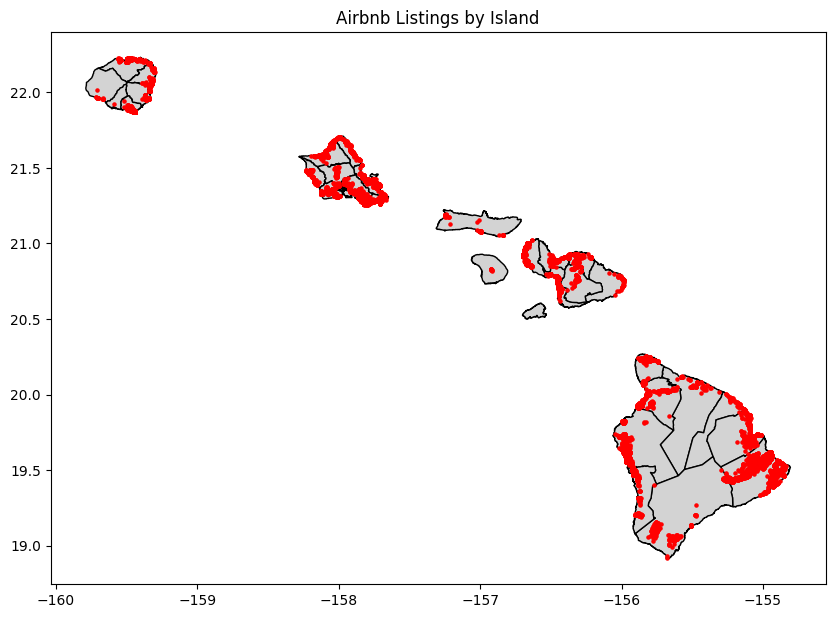

In [15]:
#%pip install GeoPandas
import geopandas as gpd

geo_data = gpd.read_file("neighbourhoods.geojson")


#Create a GeoDataFrame from the latitude and longitude data
latlong_gdf = gpd.GeoDataFrame(
    airbnb[["latitude", "longitude"]], 
    geometry=gpd.points_from_xy(airbnb.longitude, airbnb.latitude),
    crs="EPSG:4326"  # Coordinate reference system for latitude/longitude
)

#Plot
fig, ax = plt.subplots(figsize=(10, 10))
geo_data.plot(ax=ax, color='lightgrey', edgecolor='black')
latlong_gdf.plot(ax=ax, color='red', markersize=5)
plt.title("Airbnb Listings by Island")
plt.show()


We have listings that cover 6 different Hawaiian islands, including the islands of Molokai and Lanai which have stricter tourism regulations and are less frequently visited than the other islands.

##### Map Properties by Price

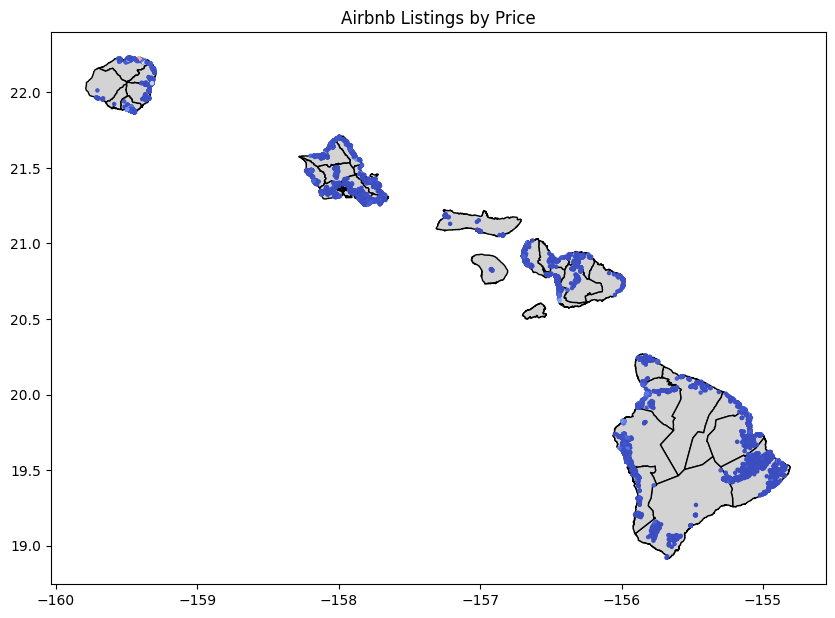

In [24]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 10))
geo_data.plot(ax=ax, color='lightgrey', edgecolor='black')
latlong_gdf.plot(ax=ax, column=airbnb['price'], cmap='coolwarm', markersize=5)
plt.title("Airbnb Listings by Price")
plt.show()


Prices are mapped in a color scale of dark blue to dark red, showing prices from the lowest to the highest ranges. At first glance there seems to be a pretty even distribution of prices across the islands.

##### Map Properties by Accommodation Number

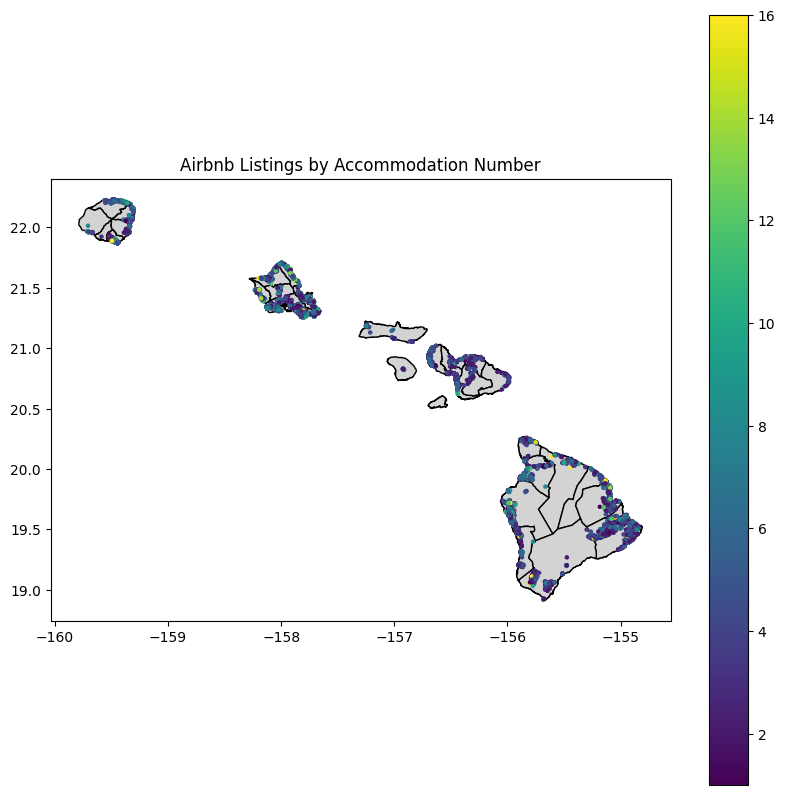

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
geo_data.plot(ax=ax, color='lightgrey', edgecolor='black')
latlong_gdf.plot(ax=ax, column=airbnb['accommodates'], markersize=5, legend=True)
plt.title("Airbnb Listings by Accommodation Number")
plt.show()

The majority of properties can accommodate between 2-8 people, which we would expect

##### Map Properties by Review Score

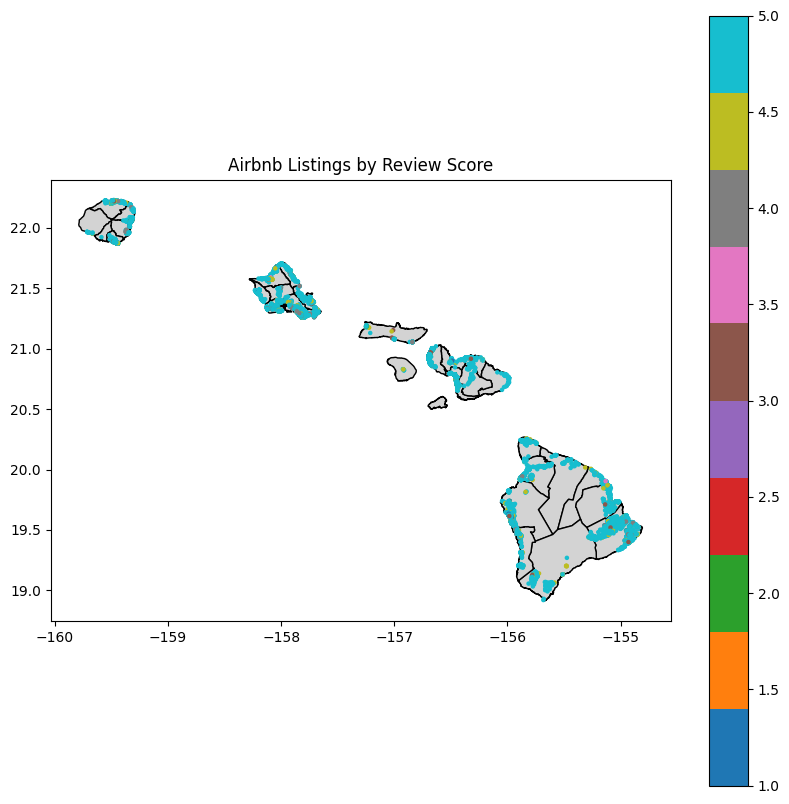

In [18]:

fig, ax = plt.subplots(figsize=(10, 10))
geo_data.plot(ax=ax, color='lightgrey', edgecolor='black')
latlong_gdf.plot(ax=ax, column=airbnb['review_scores_rating'],cmap= 'tab10', markersize=5,legend=True)
plt.title("Airbnb Listings by Review Score")
plt.show()

Most properties seem to have a 5-star rating